In [1]:
import json
import pandas as pd
import numpy as np
from shapely.geometry import shape, box, GeometryCollection, Polygon
from shapely.affinity import scale
from packer import (IrregularPackerStrictGBFLS, CirclePackerBeeLS, CirclePackerBee, CirclePackerBeeStrict,
    CirclePackerPSO, IrregularPacker, IrregularPackerGridBF, IrregularPackerGBFLS, IrregularPackerPSO,
    CirclePackerBeeStrictLS, CirclePackerStrictPSO, IrregularPackerStrictGridBF, IrregularPackerStrictPSO,
    IrregularPackerPSOLS, IrregularPackerStrictPSOLS, CirclePackerPSOLS, CirclePackerStrictPSOLS,
                    CirclePackerBeeIntensification, IrregularPackerLSIntensification, IrregularPackerStrictLSIntensification)
from tests import ALL_TESTS

In [2]:
df = pd.read_csv('../results/test_results.csv')

In [3]:
df

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
0,rect_small,IrregularPackerGridBF,40.0,1000.0,1.0,5.0,2.0,3.0,1.0,0.265659,0.713798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rect_small,IrregularPackerStrictGridBF,40.0,1000.0,1.0,5.0,2.0,3.0,1.0,0.553296,0.771020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rect_small,CirclePackerBee,40.0,1000.0,1.0,5.0,2.0,3.0,NaN,1.360043,0.435788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rect_small,CirclePackerBeeStrict,40.0,1000.0,1.0,5.0,2.0,3.0,NaN,7.306174,0.410951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rect_medium,IrregularPackerGridBF,40.0,1000.0,1.0,5.0,2.0,3.0,1.0,5.795032,0.540347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7137,irregular_small,CirclePackerBeeStrict,40.0,1000.0,5.0,8.0,8.0,10.0,NaN,65.127473,0.636390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7138,irregular_medium,IrregularPackerGridBF,40.0,1000.0,5.0,8.0,8.0,10.0,1.0,46.330305,0.519730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7139,irregular_hole_small,IrregularPackerGridBF,40.0,1000.0,5.0,8.0,8.0,10.0,1.0,0.567396,0.915070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7140,irregular_hole_small,CirclePackerBee,40.0,1000.0,5.0,8.0,8.0,10.0,NaN,9.354732,0.872858,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
condition = (df['test'] == 'rect_small') & (df['model'].str.contains('Circle')) & ~(df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
6273,rect_small,CirclePackerBee,40.0,1000.0,5.0,5.0,8.0,3.0,NaN,6.777489,0.278389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,rect_small,CirclePackerBee,40.0,1000.0,5.0,5.0,8.0,3.0,NaN,6.779034,0.278389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6246,rect_small,CirclePackerBee,40.0,1000.0,5.0,5.0,8.0,3.0,NaN,6.809308,0.278389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,rect_small,CirclePackerBee,40.0,1000.0,5.0,5.0,8.0,10.0,NaN,18.173824,0.278389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6342,rect_small,CirclePackerBee,40.0,1000.0,5.0,5.0,8.0,10.0,NaN,18.194394,0.278389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,rect_small,CirclePackerBeeLSIntensification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.089923,0.474946,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5873,rect_small,CirclePackerBeeLSIntensification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.103196,0.474946,NaN,NaN,NaN,NaN,NaN,NaN,10.0
6236,rect_small,CirclePackerBeeLSIntensification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.140682,0.474946,NaN,NaN,NaN,NaN,NaN,NaN,10.0
7017,rect_small,CirclePackerBeeLSIntensification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.211581,0.474946,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [5]:
container = ALL_TESTS[0]['container']
radius = ALL_TESTS[0]['radius']

In [6]:
%%time
packer = CirclePackerBee(
    container,
    radius,
    intersection_threshold=40,
    max_iter=1000,
    shots=3,
    n_neighbors=5,
    step_portion=8,
    queue_length=3
)
df_sol = packer.pack()

CPU times: user 988 ms, sys: 11.1 ms, total: 999 ms
Wall time: 1 s


Number of circles: 29 - Score: 0.189


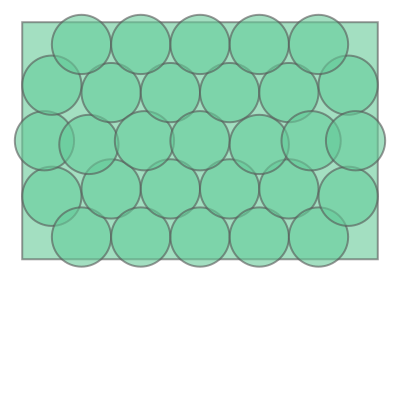

In [7]:
print('Number of circles:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [16]:
%%time
packer = CirclePackerBeeIntensification(
    container,
    radius,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=16,
    step_portion=2,
    queue_length=3,
    n_search=100
)
df_sol = packer.pack()

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 1min 56s, sys: 2.76 s, total: 1min 59s
Wall time: 3min 7s


Number of circles: 26 - Score: 0.379


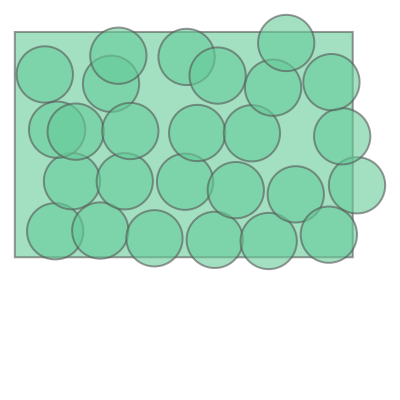

In [17]:
print('Number of circles:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [38]:
%%time
packer = CirclePackerPSO(
    container,
    radius,
    phi_p=1.0,
    phi_g=1.0,
    w=0.1,
    n_particles=10,
    n_iterations=10,
    n_circle_iter=3
)
packer.pack()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 24.1 s, sys: 888 ms, total: 25 s
Wall time: 27.5 s


Number of circles: 24 - Score: 0.402


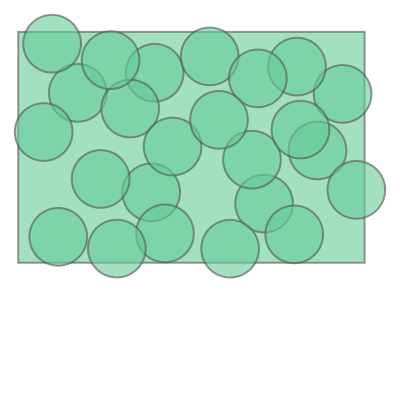

In [39]:
_packer = packer.get_packer()
df_sol = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df_sol)
print('Number of circles:', len(df_sol), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df_sol['item']])

In [8]:
condition = (df['test'] == 'rect_small') & (df['model'].str.contains('Irregular')) & ~(df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
5416,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,16.0,2.0,3.0,32.0,4.756527,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2966,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,5.0,2.0,3.0,32.0,4.813837,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4707,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,12.0,2.0,3.0,32.0,5.001652,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3871,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,8.0,2.0,3.0,32.0,5.364842,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6098,rect_small,IrregularPackerGridBF,40.0,1000.0,5.0,5.0,2.0,3.0,32.0,7.258503,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,rect_small,IrregularPackerGridBF,40.0,1000.0,1.0,16.0,32.0,20.0,1.0,0.984418,0.818768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,rect_small,IrregularPackerGridBF,40.0,1000.0,1.0,12.0,32.0,20.0,1.0,0.995063,0.818768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,rect_small,IrregularPackerIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,1.566230,0.827819,NaN,NaN,NaN,NaN,NaN,NaN,10.0
6401,rect_small,IrregularPackerIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,12.465732,0.827819,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [9]:
container = ALL_TESTS[0]['container']
shapes = ALL_TESTS[0]['shapes']

In [10]:
%%time
packer = IrregularPackerGridBF(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=3,
    n_neighbors=5,
    step_portion=2,
    queue_length=3,
    n_rotations=32
)
df_sol = packer.pack()

CPU times: user 1.81 s, sys: 70 ms, total: 1.88 s
Wall time: 4.32 s


Number of circles: 5 - Score: 0.277


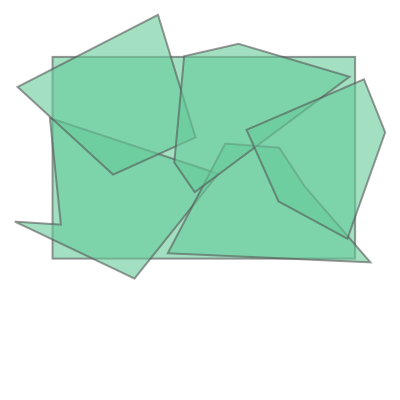

In [11]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [12]:
%%time
packer = IrregularPackerGBFLS(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=5,
    step_portion=2,
    queue_length=10,
    n_rotations=32,
    n_search=10
)
df_sol = packer.pack()

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 39.6 s, sys: 955 ms, total: 40.5 s
Wall time: 40.6 s


Number of items: 6 - Score: 0.309


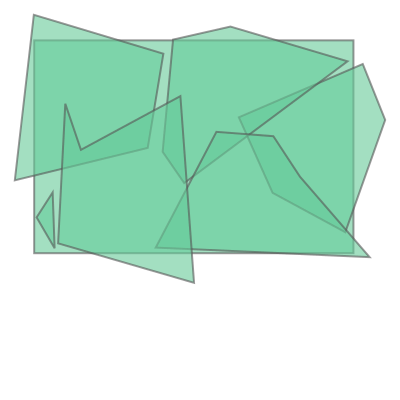

In [14]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [15]:
%%time
packer = IrregularPackerPSO(
    container,
    shapes,
    phi_p=1.0,
    phi_g=1.0,
    w=0.1,
    n_particles=10,
    n_iterations=10
)
packer.pack()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 1min 5s, sys: 2.05 s, total: 1min 7s
Wall time: 1min 8s


Number of circles: 5 - Score: 0.349


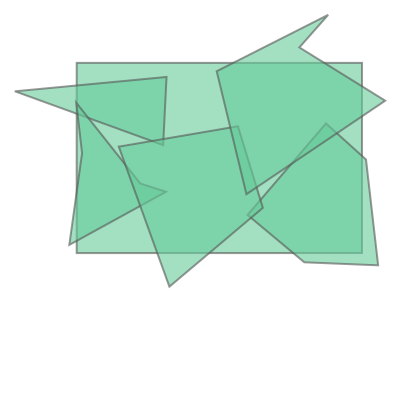

In [16]:
_packer = packer.get_packer()
df_sol = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df_sol)
print('Number of items:', len(df_sol), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df_sol['item']])

In [17]:
%%time
packer = IrregularPackerLSIntensification(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=5,
    step_portion=2,
    queue_length=3,
    n_rotations=1,
    n_search=10
)
df_sol = packer.pack()

  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 46.9 s, sys: 798 ms, total: 47.7 s
Wall time: 47.8 s


Number of items: 10 - Score: 0.608


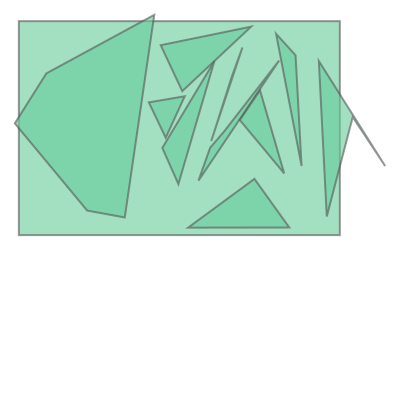

In [18]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [19]:
condition = (df['test'] == 'rect_small') & (df['model'].str.contains('Irregular')) & (df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_search,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations
3800,rect_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.141223,0.447907,NaN,NaN,1.0,1.0,0.1,100.0,10.0
2851,rect_small,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,10.0,32.0,87.561997,0.525519,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3457,rect_small,IrregularPackerStrictGridBF,40.0,1000.0,1.0,16.0,16.0,3.0,32.0,1.685683,0.527208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2593,rect_small,IrregularPackerStrictGridBF,40.0,1000.0,1.0,12.0,16.0,3.0,32.0,1.773391,0.527208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,rect_small,IrregularPackerStrictGridBF,40.0,1000.0,1.0,5.0,16.0,3.0,32.0,1.863596,0.527208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,rect_small,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,2.0,3.0,1.0,7.984032,0.867187,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
774,rect_small,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,2.0,3.0,16.0,0.677428,0.869150,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3350,rect_small,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,2.0,20.0,1.0,0.750360,0.903434,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1718,rect_small,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,2.0,10.0,1.0,0.237274,0.915175,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
%%time
packer = IrregularPackerStrictPSO(
    container,
    shapes,
    phi_p=1.0,
    phi_g=1.0,
    w=0.1,
    n_particles=100,
    n_iterations=10
)
packer.pack()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 3min 52s, sys: 3.5 s, total: 3min 55s
Wall time: 3min 56s


Number of items: 2 - Score: 0.536


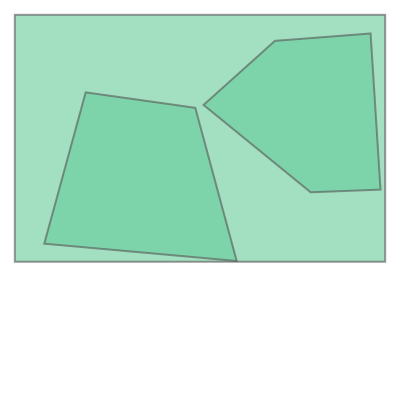

In [21]:
_packer = packer.get_packer()
df_sol = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df_sol)
print('Number of items:', len(df_sol), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df_sol['item']])

In [22]:
%%time
packer = IrregularPackerStrictGBFLS(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=5,
    step_portion=2,
    queue_length=10,
    n_rotations=32,
    n_search=10
)
df_sol = packer.pack()

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 38.1 s, sys: 530 ms, total: 38.7 s
Wall time: 38.8 s


Number of items: 6 - Score: 0.594


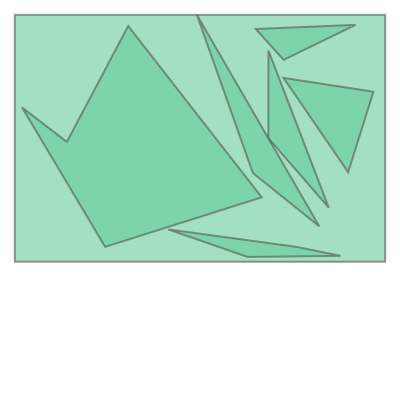

In [23]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [24]:
%%time
packer = IrregularPackerStrictGridBF(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=16,
    step_portion=16,
    queue_length=3,
    n_rotations=32
)
df_sol = packer.pack()

CPU times: user 960 ms, sys: 9.48 ms, total: 969 ms
Wall time: 986 ms


Number of items: 2 - Score: 0.527


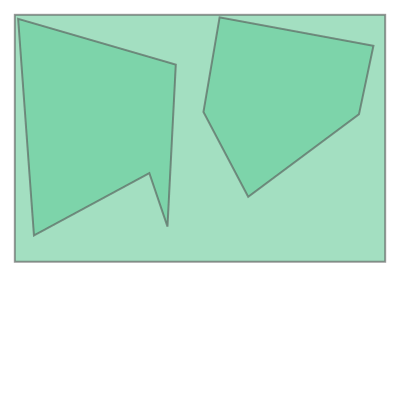

In [26]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [27]:
condition = (df['test'] == 'rect_small') & (df['model'].str.contains('Circle')) & (df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_search,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations
3869,rect_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,3.0,NaN,6.930166,0.345502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3903,rect_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,3.0,NaN,9.353185,0.345502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3842,rect_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,3.0,NaN,11.294530,0.345502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3936,rect_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,10.0,NaN,15.666695,0.345502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3993,rect_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,10.0,NaN,16.933736,0.345502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,rect_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.375513,0.705476,NaN,8.0,NaN,NaN,NaN,NaN,NaN
755,rect_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.203238,0.705476,NaN,15.0,NaN,NaN,NaN,NaN,NaN
3318,rect_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.879092,0.705476,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1234,rect_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.160167,0.738201,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [29]:
%%time
packer = CirclePackerBeeStrict(
    container,
    radius,
    intersection_threshold=40,
    max_iter=1000,
    shots=3,
    n_neighbors=5,
    step_portion=2,
    queue_length=3,
)
df_sol = packer.pack()

CPU times: user 4.58 s, sys: 110 ms, total: 4.69 s
Wall time: 4.72 s


Number of circles: 20 - Score: 0.346


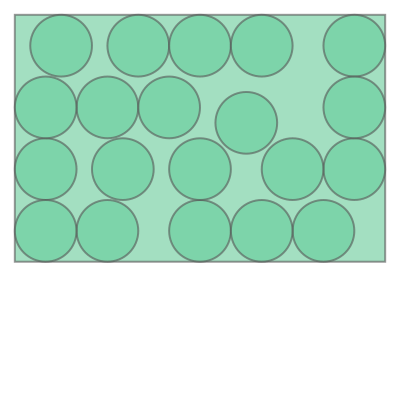

In [30]:
print('Number of circles:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [32]:
condition = (df['test'] == 'irregular_hole_small') & (df['model'].str.contains('Circle')) & (df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_search,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations
1855,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,1.0,8.0,32.0,3.0,NaN,1.143015,0.642701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,1.0,5.0,32.0,3.0,NaN,1.166704,0.642701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,1.0,5.0,32.0,3.0,NaN,1.282531,0.642701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,1.0,5.0,8.0,10.0,NaN,1.617172,0.642701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,1.0,5.0,32.0,3.0,NaN,1.666798,0.642701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,irregular_hole_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.255609,0.821350,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1067,irregular_hole_small,CirclePackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.771355,0.821350,NaN,15.0,NaN,NaN,NaN,NaN,NaN
4098,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,20.0,NaN,21.939659,0.821350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4054,irregular_hole_small,CirclePackerBeeStrict,40.0,1000.0,3.0,5.0,2.0,20.0,NaN,21.940208,0.821350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
container = ALL_TESTS[6]['container']
radius = ALL_TESTS[6]['radius']
shapes = ALL_TESTS[6]['shapes']

In [34]:
%%time
packer = CirclePackerBeeStrict(
    container,
    radius,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=8,
    step_portion=32,
    queue_length=3,
)
df_sol = packer.pack()

CPU times: user 1.03 s, sys: 22.6 ms, total: 1.05 s
Wall time: 1.08 s


Number of circles: 4 - Score: 0.643


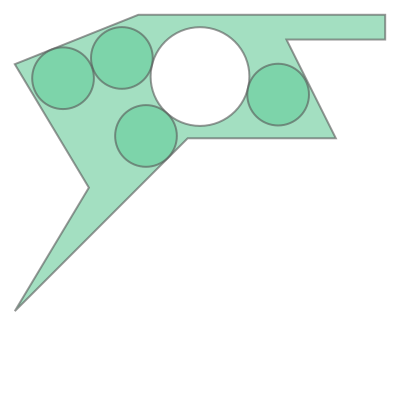

In [35]:
print('Number of circles:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [8]:
condition = (df['test'] == 'irregular_hole_small') & (df['model'].str.contains('Irregular')) & (df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_search,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations
4121,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.659850,0.713763,NaN,NaN,1.0,1.0,0.1,100.0,10.0
3215,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.687284,0.737216,NaN,NaN,1.0,1.0,0.1,10.0,1000.0
2187,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.362232,0.742840,NaN,NaN,1.0,1.0,0.1,10.0,100.0
4002,irregular_hole_small,IrregularPackerStrictLSIntensification,40.0,1000.0,1.0,5.0,2.0,20.0,16.0,229.604744,0.749943,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2474,irregular_hole_small,IrregularPackerStrictLSIntensification,40.0,1000.0,1.0,5.0,2.0,10.0,16.0,259.969787,0.773395,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1066,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.451267,0.790523,NaN,NaN,1.0,1.0,0.1,10.0,10.0
1379,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.248458,0.825161,NaN,NaN,1.0,1.0,0.1,10.0,100.0
317,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.955196,0.851558,NaN,NaN,1.0,1.0,0.1,10.0,10.0
1661,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.339656,0.853040,NaN,NaN,1.0,1.0,0.1,10.0,100.0
661,irregular_hole_small,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.020569,0.865958,NaN,NaN,1.0,1.0,0.1,10.0,10.0


In [37]:
%%time
packer = IrregularPackerStrictPSO(
    container,
    shapes,
    phi_p=1.0,
    phi_g=1.0,
    w=0.1,
    n_particles=100,
    n_iterations=10
)
packer.pack()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 50.2 s, sys: 697 ms, total: 50.8 s
Wall time: 51.1 s


Number of items: 3 - Score: 0.663


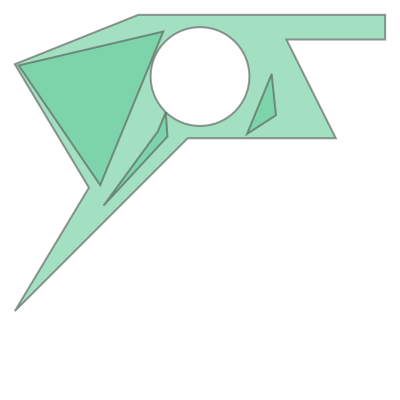

In [38]:
_packer = packer.get_packer()
df_sol = _packer.drop_external(packer.global_optimum_position.copy())
_packer.drop_intersected(df_sol)
print('Number of items:', len(df_sol), '- Score:', round(packer.global_optimum, 3))
GeometryCollection([container, *df_sol['item']])

In [9]:
%%time
packer = IrregularPackerStrictLSIntensification(
    container,
    shapes,
    intersection_threshold=40,
    max_iter=1000,
    shots=1,
    n_neighbors=5,
    step_portion=2,
    queue_length=20,
    n_rotations=16,
    n_search=10
)
df_sol = packer.pack()

  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

Finished first optimization step


  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 3min 30s, sys: 5.39 s, total: 3min 36s
Wall time: 3min 37s


Number of items: 7 - Score: 0.831


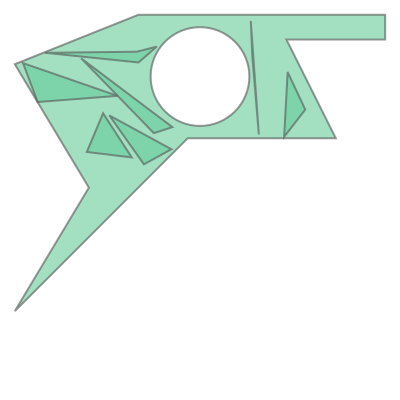

In [10]:
print('Number of items:', len(df_sol), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df_sol['item']])

In [8]:
condition = (df['test'] == 'rect_small') & (df['model'].str.contains('Irregular')) & ~(df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
5416,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,16.0,2.0,3.0,32.0,4.756527,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2966,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,5.0,2.0,3.0,32.0,4.813837,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4707,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,12.0,2.0,3.0,32.0,5.001652,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3871,rect_small,IrregularPackerGridBF,40.0,1000.0,3.0,8.0,2.0,3.0,32.0,5.364842,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6098,rect_small,IrregularPackerGridBF,40.0,1000.0,5.0,5.0,2.0,3.0,32.0,7.258503,0.277004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,rect_small,IrregularPackerGridBF,40.0,1000.0,1.0,16.0,32.0,20.0,1.0,0.984418,0.818768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,rect_small,IrregularPackerGridBF,40.0,1000.0,1.0,12.0,32.0,20.0,1.0,0.995063,0.818768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,rect_small,IrregularPackerIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,1.566230,0.827819,NaN,NaN,NaN,NaN,NaN,NaN,10.0
6401,rect_small,IrregularPackerIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,12.465732,0.827819,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [6]:
len(df[df['model'].str.contains('Intensi')])

776

In [9]:
condition = df['model'].str.contains('PSO')
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
5634,irregular_small,CirclePackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.487026,0.381996,3.0,1.0,1.0,0.1,100.0,10.0,NaN
5860,irregular_small,CirclePackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.721984,0.383848,8.0,1.0,1.0,0.1,100.0,10.0,NaN
5636,irregular_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485.265210,0.387672,NaN,1.0,1.0,0.1,100.0,10.0,NaN
5861,irregular_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.552995,0.387672,NaN,1.0,1.0,0.1,100.0,10.0,NaN
6164,irregular_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.367701,0.387672,NaN,1.0,1.0,0.1,100.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,irregular_hole_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.314102,1.148216,NaN,1.0,1.0,0.1,10.0,100.0,NaN
4407,irregular_hole_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.070575,1.148216,NaN,1.0,1.0,0.1,10.0,100.0,NaN
3074,irregular_hole_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.120413,1.213464,NaN,1.0,1.0,0.1,10.0,10.0,NaN
2840,irregular_hole_small,IrregularPackerPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.751529,1.213464,NaN,1.0,1.0,0.1,10.0,10.0,NaN


In [13]:
condition = (df['test'] == 'rect_medium') & (df['model'].str.contains('Irregular')) & (df['model'].str.contains('Strict'))
df[condition].sort_values(['score', 'time'])

,test,model,intersection_threshold,max_iter,shots,n_neighbors,step_portion,queue_length,n_rotations,time,score,n_circle_iter,phi_p,phi_g,w,n_particles,n_iterations,n_search
3675,rect_medium,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,3.0,32.0,88.517076,0.667696,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4893,rect_medium,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,10.0,32.0,104.745281,0.667696,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5898,rect_medium,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,20.0,32.0,131.627375,0.667696,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3189,rect_medium,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,3.0,16.0,97.123177,0.667712,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4531,rect_medium,IrregularPackerStrictGBFLS,40.0,1000.0,1.0,5.0,2.0,10.0,16.0,190.109219,0.667712,NaN,NaN,NaN,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,rect_medium,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,86.160954,0.769397,NaN,NaN,NaN,NaN,NaN,NaN,100.0
6559,rect_medium,IrregularPackerStrictIntensification,40.0,1000.0,1.0,5.0,8.0,3.0,1.0,322.597916,0.769397,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
2710,rect_medium,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.243601,0.778346,NaN,1.0,1.0,0.1,10.0,10.0,NaN
2934,rect_medium,IrregularPackerStrictPSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.437624,0.778346,NaN,1.0,1.0,0.1,10.0,10.0,NaN
